In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

from pytorch_tabnet.tab_model import TabNetRegressor

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Serif",
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    'figure.dpi': 125
})

In [3]:
sig_df = pd.read_csv('data/Jewel.csv')
bg_df = pd.read_csv('data/Pythia.csv')
herwig_df = pd.read_csv('data/Herwig.csv')
hydrocolbt_df = pd.read_csv('data/CoLBTHydro.csv')

In [4]:
sig_X = sig_df.dropna().iloc[:,0:-1].values
sig_Y = sig_df.dropna().iloc[:,-1].values

bg_X = bg_df.dropna().iloc[:,0:-1].values
bg_Y = bg_df.dropna().iloc[:,-1].values

herwig_X = herwig_df.dropna().iloc[:,0:-1].values
herwig_Y = herwig_df.dropna().iloc[:,-1].values

hydrocolbt_X = hydrocolbt_df.dropna().iloc[:,0:-1].values
hydrocolbt_Y = hydrocolbt_df.dropna().iloc[:,-1].values

In [5]:
sig_X_train, sig_X_test, sig_Y_train, sig_Y_test = train_test_split(sig_X, sig_Y, train_size=0.9, shuffle=False)
bg_X_train, bg_X_test, bg_Y_train, bg_Y_test = train_test_split(bg_X, bg_Y, train_size=0.9, shuffle=False)
herwig_X_train, herwig_X_test, herwig_Y_train, herwig_Y_test = train_test_split(herwig_X, herwig_Y, train_size=0.9, shuffle=False)
hydrocolbt_X_train, hydrocolbt_X_test, hydrocolbt_Y_train, hydrocolbt_Y_test = train_test_split(hydrocolbt_X, hydrocolbt_Y, train_size=0.9, shuffle=False)

In [6]:
X_test = np.concatenate((sig_X_test, bg_X_test, herwig_X_test, hydrocolbt_X_test), axis=0)
Y_test = np.concatenate((sig_Y_test, bg_Y_test, herwig_Y_test, hydrocolbt_Y_test), axis=0)

In [15]:
model = TabNetRegressor()
model.load_model('model/model.zip')

In [8]:
SIG_out = model.predict(sig_X_test)
BG_out = model.predict(bg_X_test)
herwig_out = model.predict(herwig_X_test)
hydrocolbt_out = model.predict(hydrocolbt_X_test)

In [9]:
SIG_out_ = np.where(SIG_out < 0, 0, SIG_out)
SIG_out_ = np.where(SIG_out_ > 1, 1, SIG_out_)
BG_out_ = np.where(BG_out < 0, 0, BG_out)
BG_out_ = np.where(BG_out_ > 1, 1, BG_out_)
herwig_out_ = np.where(herwig_out < 0, 0, herwig_out)
herwig_out_ = np.where(herwig_out_ > 1, 1, herwig_out_)
hydrocolbt_out_ = np.where(hydrocolbt_out < 0, 0, hydrocolbt_out)
hydrocolbt_out_ = np.where(hydrocolbt_out_ > 1, 1, hydrocolbt_out_)

In [10]:
bins = np.linspace(0, 1, 51)

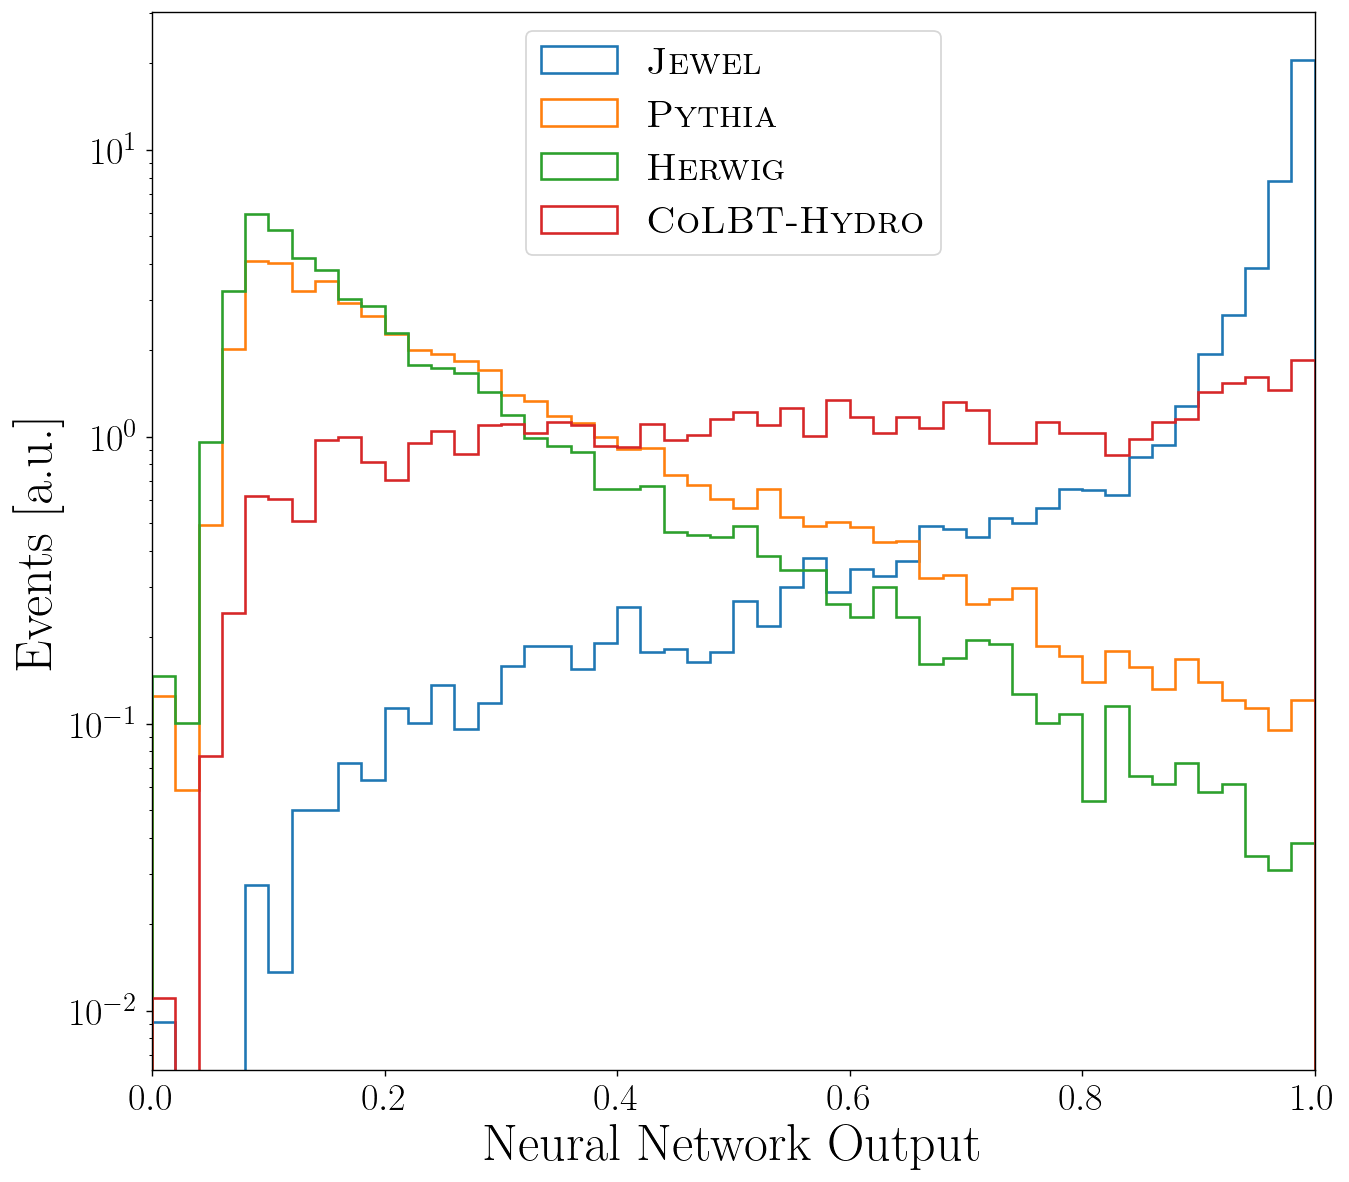

In [11]:
fig, ax = plt.subplots(1, figsize=(12,11))
plt.hist(SIG_out_, bins, histtype='step', alpha=1, density=True, stacked=True, label="\\textsc{Jewel}", fill=False, linewidth=1.5)
plt.hist(BG_out_, bins, histtype='step', alpha=1, density=True, stacked=True, label=r"\textsc{Pythia}", linewidth=1.5)
plt.hist(herwig_out_, bins, histtype='step', alpha=1, density=True, stacked=True, label="\\textsc{Herwig}", linewidth=1.5)
plt.hist(hydrocolbt_out_, bins, histtype='step', alpha=1, density=True, stacked=True, label="\\textsc{CoLBT-Hydro}", linewidth=1.5)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(loc='upper center', fontsize=22)
plt.xlim([0, 1])
# plt.ylim([1e-2, 100])
plt.xlabel("Neural Network Output", fontsize=30)
plt.ylabel("Events [a.u.]", fontsize=30)
plt.yscale('log')
plt.savefig(f'hist.pdf', dpi=400,bbox_inches='tight')

In [12]:
fpr, tpr, thresholds = roc_curve(Y_test, model.predict(X_test))
auc_ = auc(fpr, tpr)

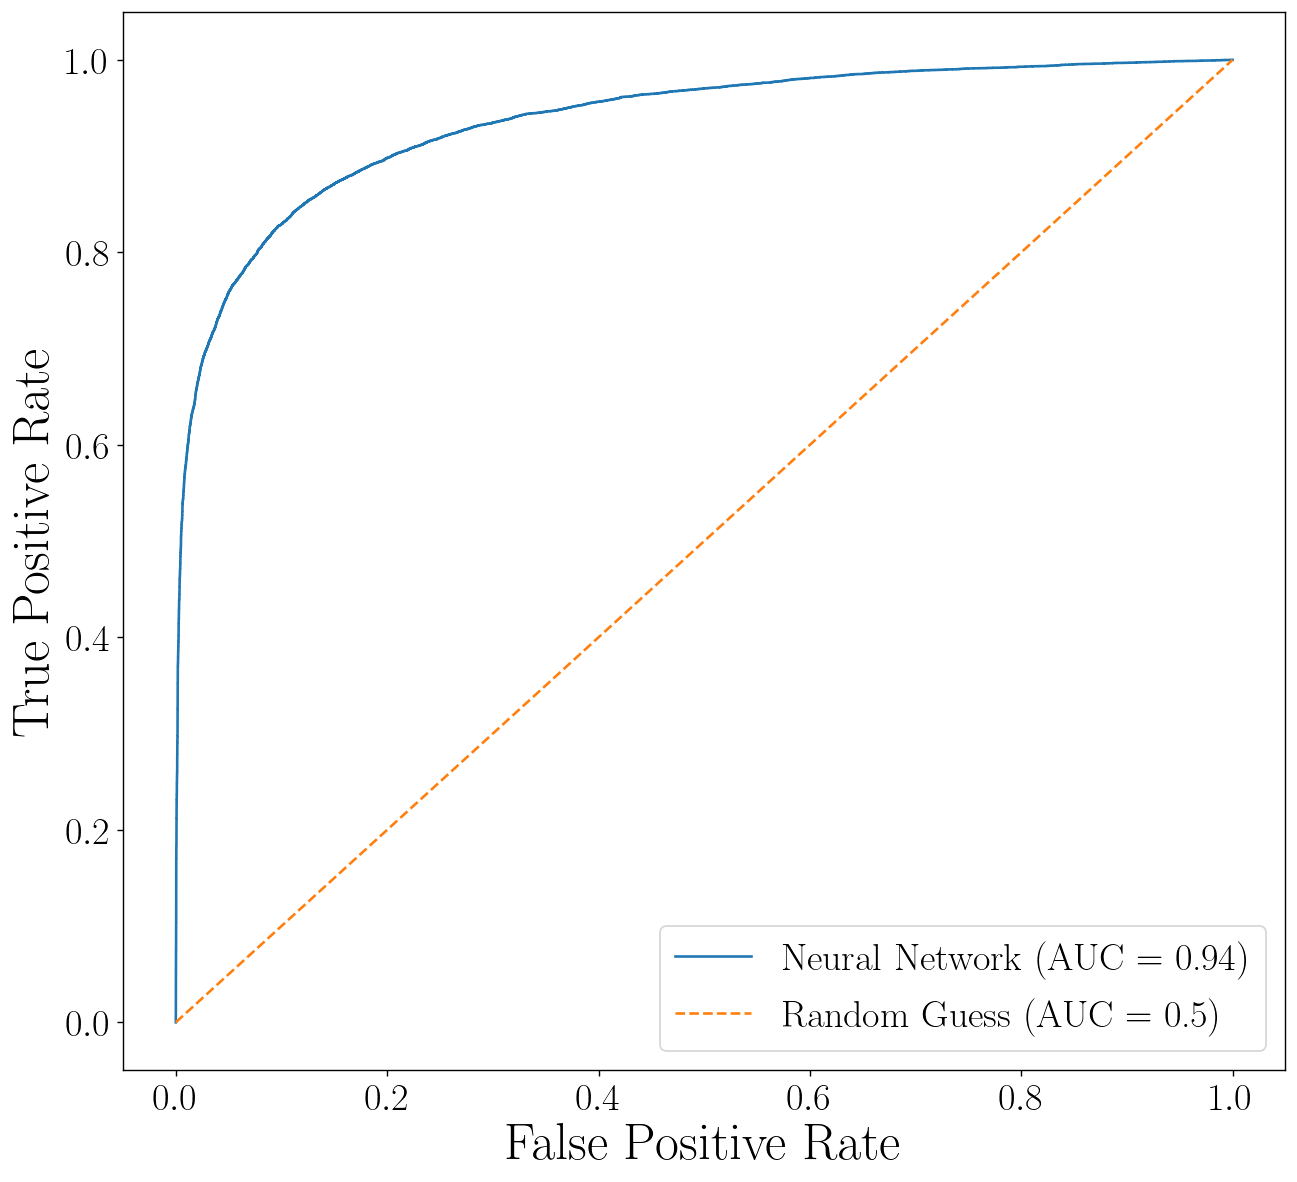

In [13]:
fig, ax = plt.subplots(1, figsize=(12,11))
plt.plot(fpr, tpr, label=f"Neural Network (AUC = {auc_:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess (AUC = 0.5)')
plt.xticks(fontsize=22)
# plt.grid(True)
plt.yticks(fontsize=22)
plt.legend(loc="lower right", fontsize=22)
ax.set_ylabel('True Positive Rate', fontsize=30)
ax.set_xlabel('False Positive Rate', fontsize=30)
plt.savefig('roc_curve.pdf', dpi=400,bbox_inches='tight')